In this chapter we study issues related to debugging. There are a few tools and techniques to identify what exactly your code is doing and where it’s going wrong. Mainly in this chapter, we will look at logging and assertions, two features that can help you detect bugs early. In general, the earlier you catch bugs, the easier they will be to fix. 

To start with debugging, we first examine the 'raise' statement. Python raises an exception whenever it tries to execute invalid code. Recall that we can use the 'try...except...' clauses to deal with exceptions. But here, you will learn that you can also raise your own exceptions in your code. Raising an exception is a way of saying, "Stop running the code in this function and move the program execution to the except statement". 

Exceptions are raised with a 'raise' statement. In Python coding, a 'raise' statement consists of the following: 1) the 'raise' keyword; 2) a call to the Exception() function, and 3) a string with a helpful error message passed to the Exception() function. In general, you will commonly see a raise statement inside a function and the 'try' and 'except' statements in the code calling the function. Below is an example:

In [1]:
def boxPrint(symbol, width, height):
    if len(symbol) != 1:
        raise Exception('Symbol must be a single character string.')
    if width <= 2:
        raise Exception('Width must be greater than 2.')
    if height <= 2:
        raise Exception('Height must be greater than 2.')
    print(symbol * width)
    for i in range(height - 2):
        print(symbol + (' ' * (width - 2)) + symbol)
    print(symbol * width)

for sym, w, h in (('*', 4, 4), ('O', 20, 5), ('x', 1, 3), ('ZZ', 3, 3)):
    try:
        boxPrint(sym, w, h)
    except Exception as err:
        print('An exception happened: ' + str(err))

****
*  *
*  *
****
OOOOOOOOOOOOOOOOOOOO
O                  O
O                  O
O                  O
OOOOOOOOOOOOOOOOOOOO
An exception happened: Width must be greater than 2.
An exception happened: Symbol must be a single character string.


Here we’ve defined a boxPrint() function that takes a character, a width, and a height, and uses the character to make a little picture of a box with that width and height. This box shape is printed out as a result. Suppose we want the character to be a single character, and the width and height to be greater than 2. We add 'if' statements to raise exceptions if these requirements aren’t satisfied. Later, when we call boxPrint() with various arguments, our try...except... clauses will handle invalid arguments. The above program uses the 'except' 'Exception' as 'err' form of the except statement. If an 'Exception' object is returned from boxPrint(), this 'except' statement will store it in a variable named 'err'. The 'Exception' object can then be converted to a string by passing it to str() to produce a user-friendly error message. 

When Python encounters an error, it produces a treasure trove of error information called the 'traceback'. The 'traceback' includes the error message, the line number of the line that caused the error, and the sequence of the function calls that led to the error. This sequence of calls is called the 'call stack'. The 'traceback' is displayed by Python whenever a raised exception goes unhandled. But you can also obtain it as a string by calling traceback.format_exc(). This function is useful if you want the information from an exception’s traceback but also want an 'except' statement to gracefully handle the exception. You will need to import Python’s 'traceback' module before calling this function.

For example, instead of crashing your program right when an exception occurs, you can write the 'traceback' information to a log file and keep your program running. You can look at the log file later, when you’re ready to debug your program. Below is an example:

In [1]:
import traceback, os
os.chdir("C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Datasets and Files")
print('Log directory: ' + os.getcwd())
try:
    raise Exception('This is the error message.')
except:
    errorFile = open('errorInfo.txt', 'w')
    errorFile.write(traceback.format_exc())
    errorFile.close()
    print('The traceback info was written to errorInfo.txt.')

Log directory: C:\Users\GAO\Anaconda\Gao_Jupyter_Notebook_Python_Codes\Automate the Boring Stuff with Python\Datasets and Files
The traceback info was written to errorInfo.txt.


We now move onto the next topic called 'assertions'. An assertion is a sanity check to make sure your code isn’t doing something obviously wrong. These sanity checks are performed by the 'assert' statements. If the sanity check fails, then an 'AssertionError' exception is raised. In code, an 'assert' statement consists of the following: 1) the 'assert' keyword; 2) a condition (that is, an expression that evaluates to True or False); 3) a comma, and 4) a string to display when the condition is False. In plain English, an 'assert' statement says, "I assert that this condition holds true, and if not, there is a bug somewhere in the program." Unlike exceptions, your code should not handle 'assert' statements with 'try...except...'; if an 'assert' fails, your program should crash. By failing fast like this, you shorten the time between the original cause of the bug and when you first notice the bug. This will reduce the amount of code you will have to check before finding the code that’s causing the bug. Assertions are for programmer errors, not user errors. For errors that can be recovered from (such as a file not being found or the user entering invalid data), raise an exception instead of detecting it with an 'assert' statement.

Suppose as an example below, we type in the four lines of code. We should expect an 'AssertionError':

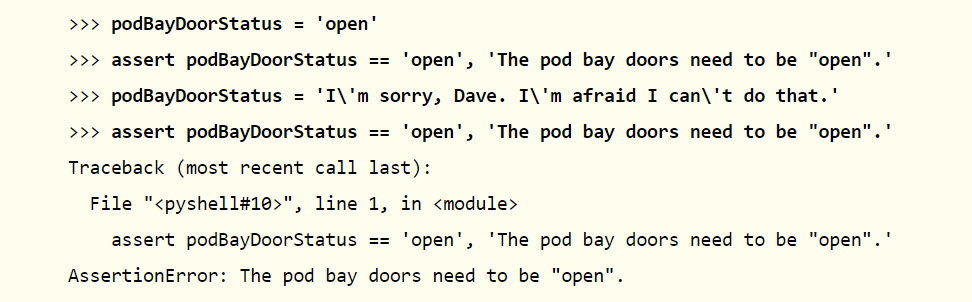

In [10]:
from IPython.display import Image
Image("C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Datasets and Files\\ch10_snapshot_1.jpg") 

Here we’ve set 'podBayDoorStatus' to 'open', so from now on, we fully expect the value of this variable to be 'open'. In a program that uses this variable, we might have written a lot of code under the assumption that the value is 'open' — code that depends on its being 'open' in order to work as we expect. So we add an assertion to make sure we’re right to assume 'podBayDoorStatus' is 'open'. Here, we include the message "The pod bay doors need to be 'open'." so it’ll be easy to see what’s wrong if the assertion fails. Later, say we make the obvious mistake of assigning 'podBayDoorStatus' another value, but don’t notice it among many lines of code. The assertion catches this mistake and clearly tells us what’s wrong. The idea here is that with the help of the assertion statement, programmers get a reminder that certain variables need to be coded in certain ways so that they don't easily make mistakes. The assertion statement is a very common debugging tool. Once debugging is complete, the assertion statement can be taken away from the production code. 

We now study 'logging' in Python. To motivate logging, if you’ve ever put a print() statement in your code to output some variable’s value while your program is running, you’ve used a form of logging to debug your code. Logging is a
great way to understand what’s happening in your program and in what order its happening. Python’s logging module makes it easy to create a record of custom messages that you write. These log messages will describe when the program execution has reached the logging function call and list any variables you have specified at that point in time. On
the other hand, a missing log message indicates a part of the code was skipped and never executed.

To enable the 'logging' module to display log messages on your screen as your program runs, you can run the following command:

In [4]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')

You don’t need to worry too much about how this works, but basically, when Python logs an event, it creates a 'LogRecord' object that holds information about that event. The logging module’s basicConfig() function lets you specify what details about the 'LogRecord' object you want to see and how you want those details displayed.

Now let's look at an example:

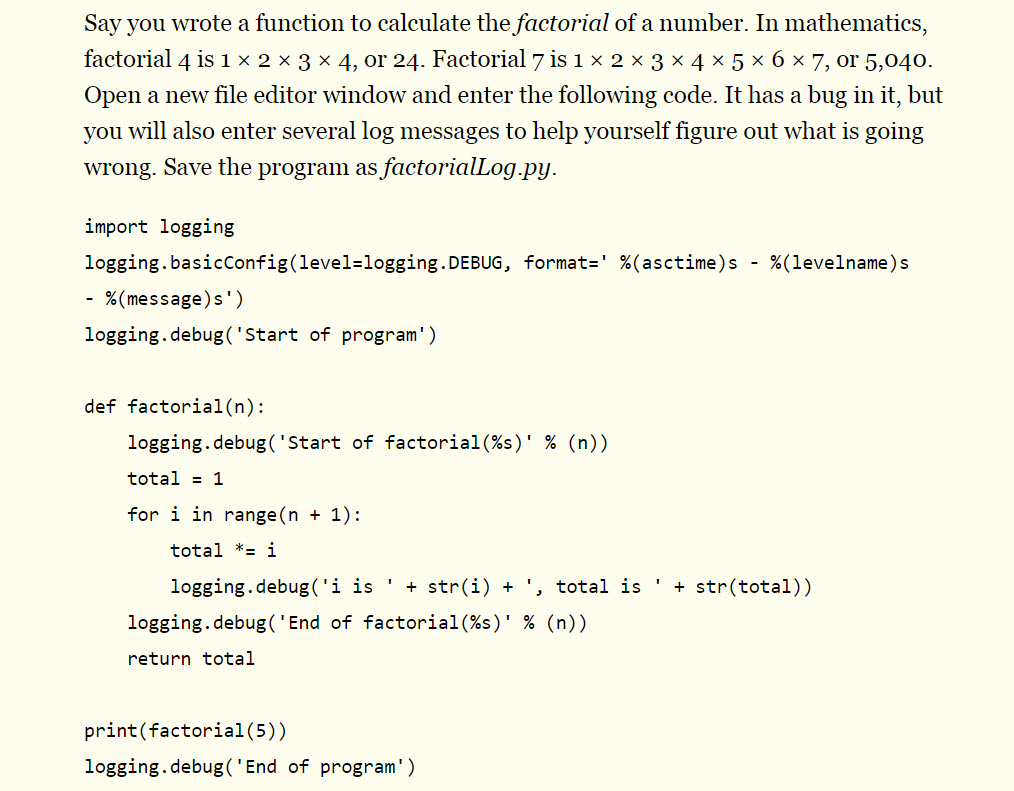

In [5]:
from IPython.display import Image
Image("C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Datasets and Files\\ch10_snapshot_2.jpg") 

Here, for the aforementioned example, we use the logging.debug() function when we want to print log information. This
debug() function will call basicConfig(), and a line of information will be printed. This information will be in the format we specified in basicConfig() and will include the messages we passed to debug(). The print(factorial(5)) call is part of the original program, so the result is displayed even if logging messages are disabled.

The output of this program may look like this:

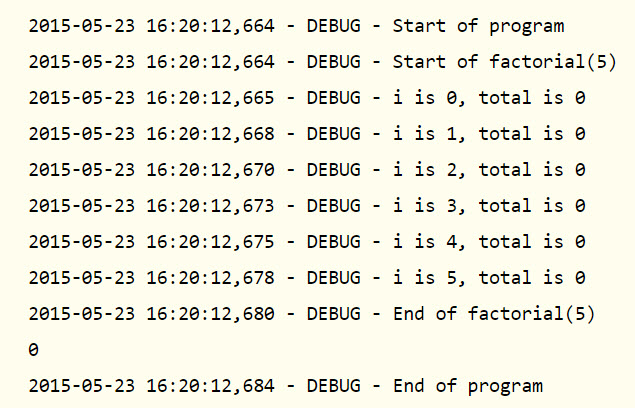

In [6]:
Image("C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Datasets and Files\\ch10_snapshot_3.jpg") 

The factorial() function is returning 0 as the factorial of 5, which isn’t right. The 'for' loop should be multiplying the value in 'total' by the numbers from 1 to 5. But the log messages displayed by logging.debug() show that the 'i' variable is starting at 0 instead of 1. Since zero times anything is zero, the rest of the iterations also have the wrong value for 'total'. Logging messages provide a trail of breadcrumbs that can help you figure out when things started to go wrong.

If you change the 'for i in range(n + 1):' line to 'for i in range(1, n + 1):', and run the program again, you will see that the output will look like the following. Below, the factorial(5) call correctly returns 120. The log messages showed what was going on inside the loop, which led straight to the bug:

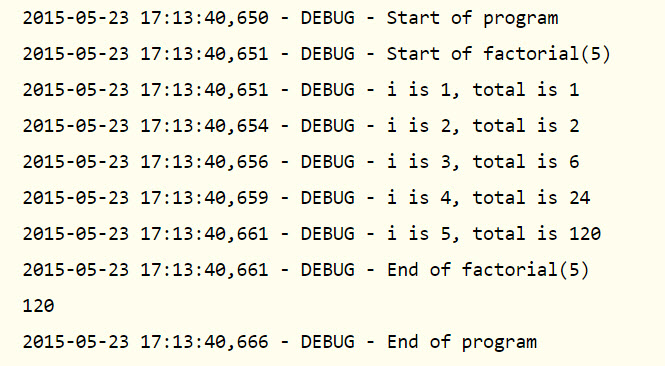

In [11]:
Image("C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Datasets and Files\\ch10_snapshot_4.jpg") 

A side note is worth mentioning here: In general, typing commands such as "import logging" and "logging.basicConfig(level=logging.DEBUG, format= '%(asctime)s - %(levelname)s - %(message)s')" is somewhat unwieldy. You may tempted to use print() calls instead, but don’t give in to this temptation! Once you’re done debugging, you’ll end up spending a lot of time removing print() calls from your code for each log message. You may even accidentally remove some print() calls that were being used for non-log messages. The nice thing about log messages is that you’re free to fill your program with as many as you like, and you can always disable them later by adding a single line of code such as logging.disable(logging.CRITICAL) call. Unlike print(), the 'logging' module makes it easy to switch between showing and hiding log messages.

Logging levels provide a way to categorize your log messages by importance. There are five logging levels, described in the table below from least to most important. Messages can be logged at each level using a different logging function:

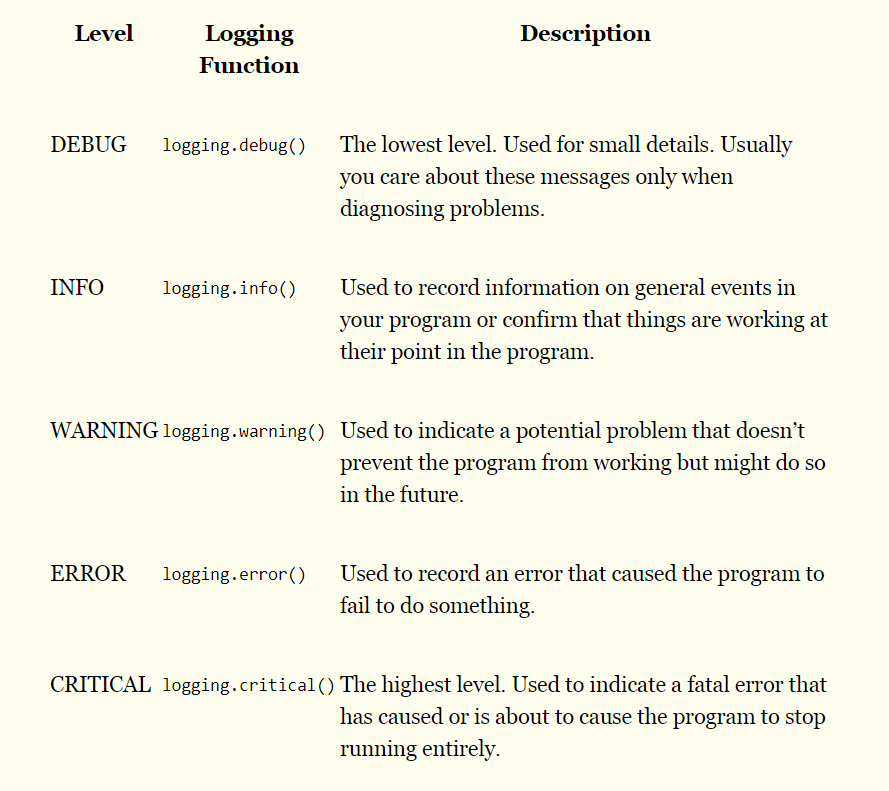

In [8]:
Image("C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Datasets and Files\\ch10_snapshot_5.jpg") 

The benefit of logging levels is that you can change what priority of logging message you want to see. Passing logging.DEBUG to the basicConfig() function’s level keyword argument will show messages from all the logging levels (DEBUG being the lowest level). But after developing your program some more, you may be interested only in errors. In that case, you can set basicConfig()’s level argument to logging.ERROR. This will show only ERROR and CRITICAL messages and skip the DEBUG, INFO, and WARNING messages.

After you’ve debugged your program, you probably don’t want all these log messages cluttering the screen. The logging.disable() function disables these so that you don’t have to go into your program and remove all the logging calls by hand. You simply pass logging.disable() a logging level, and it will suppress all log messages at that level or lower. So if you want to disable logging entirely, just add logging.disable(logging.CRITICAL) to your program.

Instead of displaying the log messages to the screen, you can write them to a text file. The logging.basicConfig() function takes a filename keyword argument. While logging messages are helpful, they can clutter your screen and make it hard to read the program’s output. Writing the logging messages to a file will keep your screen clear and store the messages so you can read them after running the program. You can open this text file in any text editor, such as Notepad or TextEdit. This is very similar to the proc printto in SAS.